In [1]:
from matplotlib import pyplot as plt
import numpy as np
import torch


Matplotlib created a temporary config/cache directory at /var/folders/nf/8m8xlbhs4yg7rbtnlz7wymtr0000gn/T/matplotlib-2lbzmn7p because the default path (/Users/admin/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [3]:
from torchvision import datasets, transforms
data_path = '../datasets/p1ch7/cifar10'
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=True,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

1.8%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

4.4%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

6.9%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

9.4%IOPub mes

80.7%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

83.8%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

87.6%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

90.5%IOPub

Extracting ../datasets/p1ch7/cifar10/cifar-10-python.tar.gz to ../datasets/p1ch7/cifar10


In [4]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [5]:
label_map={0:0, 2:1}
class_names=['airplane', 'bird']
cifar2=[(img, label_map[label])
       for img, label in cifar10
       if label in [0,2]]

In [7]:
len(cifar2)

10000

In [12]:
cifar2[9000]

(tensor([[[ 1.1855,  1.0585,  0.9632,  ...,  1.7253,  1.8047,  1.8206],
          [ 1.2331,  1.1855,  1.1696,  ...,  1.7888,  1.8523,  1.8841],
          [ 1.2331,  1.1855,  1.1855,  ...,  1.7570,  1.8047,  1.8364],
          ...,
          [-0.5133, -0.6245, -0.6562,  ..., -0.6404, -0.6404, -0.6404],
          [-0.5292, -0.6404, -0.6880,  ..., -0.6562, -0.6562, -0.6721],
          [-0.4657, -0.6404, -0.6404,  ..., -0.5927, -0.5927, -0.5451]],
 
         [[ 0.8860,  0.7572,  0.6605,  ...,  1.6590,  1.7396,  1.7718],
          [ 0.9343,  0.8860,  0.8699,  ...,  1.7235,  1.7879,  1.8201],
          [ 0.9182,  0.8860,  0.8860,  ...,  1.6751,  1.7396,  1.7718],
          ...,
          [-0.4507, -0.5635, -0.5957,  ..., -0.5635, -0.5635, -0.5635],
          [-0.4507, -0.5796, -0.6279,  ..., -0.5796, -0.5796, -0.5957],
          [-0.4024, -0.5796, -0.5957,  ..., -0.5151, -0.5151, -0.4829]],
 
         [[ 0.7655,  0.6456,  0.5556,  ...,  1.6350,  1.7099,  1.7399],
          [ 0.7955,  0.7655,

In [13]:
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

In [14]:
import torch.nn as nn

In [15]:
n_out=2
model=nn.Sequential(
    nn.Linear(3072,512),
    nn.Tanh(),
    nn.Linear(512,n_out)
)

In [17]:
softmax=nn.Softmax(dim=1)

In [18]:
model=nn.Sequential(
    nn.Linear(3072,512),
    nn.Tanh(),
    nn.Linear(512,n_out),
    nn.Softmax(dim=1)
)

In [19]:
img=cifar2[0][0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


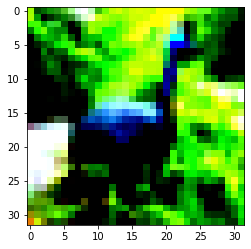

In [21]:
plt.imshow(img.permute(1,2,0))

In [23]:
img_batch=img.view(-1).unsqueeze(0)
out=model(img_batch)
out

tensor([[0.4462, 0.5538]], grad_fn=<SoftmaxBackward0>)

In [29]:
import torch.optim as optim

model=nn.Sequential(
    nn.Linear(3072,512),
    nn.Tanh(),
    nn.Linear(512,n_out),
    nn.LogSoftmax(dim=1)
)

le=1e-2

opt=optim.SGD(model.parameters(), lr=le)

loss_fn=nn.NLLLoss()

n_epochs=100

In [26]:
for epoch in range(n_epochs):
    for img, label in cifar2:
        out=model(img.view(-1).unsqueeze(0))
        loss=loss_fn(out, torch.tensor([label]))
        
        opt.zero_grad()
        loss.backward()
        opt.step()
        
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 6.649787
Epoch: 1, Loss: 2.114121
Epoch: 2, Loss: 3.284232
Epoch: 3, Loss: 1.447912
Epoch: 4, Loss: 10.743030
Epoch: 5, Loss: 5.128467
Epoch: 6, Loss: 10.168728
Epoch: 7, Loss: 13.138442
Epoch: 8, Loss: 12.173812
Epoch: 9, Loss: 9.966918
Epoch: 10, Loss: 13.209167
Epoch: 11, Loss: 0.906577
Epoch: 12, Loss: 9.757363


KeyboardInterrupt: 